In [118]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [5]:
df = pd.read_csv("df.csv")
print(df.shape)
df = df.drop(["Unnamed: 0"], axis = 1)
df.columns.values[0] = 'label' # renaming first column to label (y)
df.head(3)

(10000, 786)


,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [7]:
X = df.iloc[:, 1:]
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [103]:
rfc = RandomForestClassifier(n_jobs=-1,
                             n_estimators=350,
                             max_depth = 35,
                             max_features = 28,
                             bootstrap = False)

In [104]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=35, max_features=28, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
rfc.score(X_test, y_test)

0.9316

In [106]:
rcf_predictions = rfc.predict(X_test) 
  
# model accuracy for X_test   
accuracy = rfc.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, rcf_predictions) 

### Grid search

In [ ]:
param_grid = [
{'n_estimators': [10, 50, 100, 350], 'max_features': [10, 28, 50], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

In [ ]:
#find the best model of grid search
grid_search_forest.best_estimator_
grid_search_forest.best_params_

In [ ]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best number of estimators:',svm_model.best_estimator_.n_estimators,"\n") 
print('Best max_features:',svm_model.best_estimator_.max_features,"\n")
print('Best max_depth:',svm_model.best_estimator_.max_depth,"\n")
print('Best bootstrap:',svm_model.best_estimator_.bootstrap,"\n")

In [107]:
print(accuracy)

0.9316


In [108]:
print(cm)

[[247   1   1   0   1   0   4   1   2   0]
 [  0 247   1   2   2   1   1   0   1   1]
 [  4   3 206   0   4   2   1   2   5   7]
 [  1   1   1 228   1   1   1   2   8   7]
 [  3   4   0   0 258   0   5   1   0   3]
 [  1   2   0   2   0 224   2   1   2   4]
 [  0   2   1   0   4   4 237   2   1   1]
 [  1   2   0   0   6   1   0 244   0   3]
 [  0   5   4   2   4   1   2   4 237   7]
 [  0   1   0   2   4   1   0   1   5 201]]


In [ ]:
Colormap Greddens is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

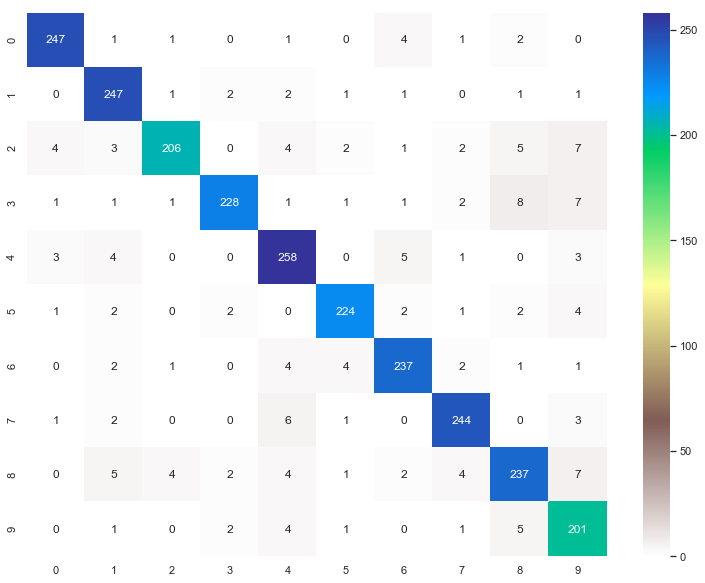

In [141]:
plt.figure(figsize=(13,10))
sns.set_context("notebook")
sns.heatmap(cm, annot = True, fmt="d", cmap="terrain_r")
plt.show()

In [109]:
print(classification_report(y_test, rcf_predictions))

print("Training set score for RF: %f" % rfc.score(X_train , y_train))
print("Testing  set score for RF: %f" % rfc.score(X_test  , y_test ))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       257
           1       0.92      0.96      0.94       256
           2       0.96      0.88      0.92       234
           3       0.97      0.91      0.94       251
           4       0.91      0.94      0.92       274
           5       0.95      0.94      0.95       238
           6       0.94      0.94      0.94       252
           7       0.95      0.95      0.95       257
           8       0.91      0.89      0.90       266
           9       0.86      0.93      0.90       215

   micro avg       0.93      0.93      0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500

Training set score for RF: 0.999467
Testing  set score for RF: 0.931600


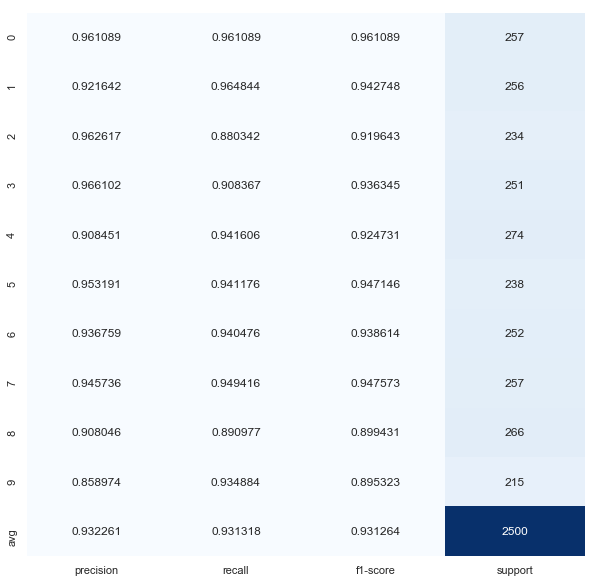

In [159]:
from sklearn.metrics import precision_recall_fscore_support

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
                cmap="Blues",
                fmt='g')

plot_classification_report(y_test, rcf_predictions)